<a href="https://colab.research.google.com/github/jollactic/CCS/blob/master/sk_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Install conda and necessary packages



In [1]:
!pip install -q condacolab

In [2]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [3]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict

In [1]:
!conda install -n base mamba dftbplus dftbplus-tools


Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - dftbplus
    - dftbplus-tools
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arpack-3.9.1               |nompi_hf03ea27_102         127 KB  conda-forge
    c-ares-1.34.6              |       hb03c661_0         203 KB  conda-forge
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    certifi-2026.1.4           |     pyhd8ed1ab_0         147 KB  conda-forge
    chimes-calculator-1.0.2    |       h0c14de7_0         185 KB  conda-forge
    conda-26.1.0               |  py311h38be061_0         1.2 MB  conda-forge
    conda-libmamba-solver-25.11.0|     pyhd8ed1ab_1          56 KB  conda-forge
    cpp-expected-1.3.1         |       h171cf75_0          24 KB  conda-forge
    dftbplu

In [2]:
!mamba install python=3.12 skprogs skprogs-python

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch     1%[+] 0.2s
conda-forge/linux-64   5%
conda-forge/noarch    13%[+] 0.3s
conda-forge/linux-64  14%
conda-forge/noarch    30%[+] 0.4s
conda-forge/linux-64  21%
conda-forge/noarch    45%[+] 0.5s
conda-forge/linux-64  25%
conda-forge/noarch    60%[+] 0.6s
conda-forge/linux-64  27%
conda-forge/noarch    66%[+] 0.7s
conda-forge/linux-64  33%
conda-forge/noarch    77%[+] 0.8s
conda-forge/linux-64  40%
conda-forge/noarch    92%conda-forge/noarch                                
[+] 0.9s
conda-forge/linux-64  51%[+] 1.0s
conda-forge/linux-64  59%[+] 1.1s
conda-forge/linux-64  65%[+] 1.2s
conda-forge/linux-64  73%[+] 1.3s
conda-forge/linux-64  81%[+] 1.4s
conda-forge/linux-64  83%[+] 1.5s
conda-forge/linux-64  92%[+] 1.6s
conda-forge/linux-64  98%conda-forge/linux-64                              

Pinned packages:

  - python=3.12

Pinned packages:

  - python_abi[version="=3.12",build="*cp312*"]

Pinned packages:

  - cudatoolkit*

In [3]:
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 105.8 MB/s eta 0:00:00


In [6]:
import ase
print(f"ASE version: {ase.__version__}")

ASE version: 3.27.0


In [29]:
import os
os.chdir('/content')
!rm -r DFTB-
!git clone https://github.com/drdamia/DFTB-.git

Cloning into 'DFTB-'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 197 (delta 28), reused 10 (delta 10), pack-reused 125 (from 1)
Receiving objects: 100% (197/197), 11.04 MiB | 26.10 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [16]:
PATH='/content/DFTB-/'   # Add your installation path here

# Compute SK-files for atoms

In [17]:
from helper import *
import os, sys, warnings
import glob
import re
from shutil import copyfile, copytree
import itertools
import numpy as np
from ase.data import atomic_numbers, atomic_names, atomic_masses, covalent_radii, vdw_radii
warnings.filterwarnings('ignore')
import argparse
import numpy as np
import sktools.common as sc
import sktools.skgen as skgen
from sktools.skdef import Skdef
from sktools import PACKAGE_VERSION

base_dir=os.getcwd()  # You should be in your production folder now.
print('Base dir is:', base_dir)
cwd = os.getcwd()
skdef_all = PATH+'/skdef.hsd'  # parameter file for the data generation
SCRIPTNAME = sc.get_script_name()

# make the directory for the SK-generation and move in to that directory
if not os.path.isdir("SKF/"):
    os.mkdir("SKF/")

os.chdir("SKF/")
print('You are here',os.getcwd())

Base dir is: /content/SKF
You are here /content/SKF/SKF


In [ ]:
print(skdef_all)

/content/DFTB-//skdef.hsd


In [27]:
elem = str('C,C')

In [28]:
#set up input for skprogs and run skprogs generating the Slater-Koster files with a dummy rep
parser, subparsers = get_parser_and_subparser_container()
setup_parser_main(parser)
onecnt_common = get_onecnt_common_parser()
setup_parser_atom(subparsers, onecnt_common, run_atom)
setup_parser_denscomp(subparsers, onecnt_common, run_denscomp)
setup_parser_wavecomp(subparsers, onecnt_common, run_wavecomp)
twocnt_common = get_twocnt_common_parser()
setup_parser_twocnt(subparsers, twocnt_common, run_twocnt)
setup_parser_sktable(subparsers, twocnt_common, run_sktable)

class Args:
    includedirs=[]
    configfiles=[skdef_all]
    builddir='_build'
    onecnt_binary='slateratom'
    twocnt_binary='sktwocnt'
    loglevel='info'
    element1=elem
    element2=elem
    dummyrep=True
    outdir='.'
    func=run_sktable


args=Args()

#run
args.func()

[colab_kernel_launcher.py] Subcommand sktable started
[colab_kernel_launcher.py] Subcommand sktable started
[colab_kernel_launcher.py] Subcommand sktable started
[colab_kernel_launcher.py] Subcommand sktable started
[colab_kernel_launcher.py] Subcommand sktable started
[skgen.sktable] Started for C-C
[skgen.sktable] Started for C-C
[skgen.sktable] Started for C-C
[skgen.sktable] Started for C-C
[skgen.sktable] Started for C-C
[skgen.sktable] Creating free atom prerequisite for C
[skgen.sktable] Creating free atom prerequisite for C
[skgen.sktable] Creating free atom prerequisite for C
[skgen.sktable] Creating free atom prerequisite for C
[skgen.sktable] Creating free atom prerequisite for C
[skgen.atom] Started for C
[skgen.atom] Started for C
[skgen.atom] Started for C
[skgen.atom] Started for C
[skgen.atom] Started for C
[skgen.atom] Calculating spin polarized atom (_build/c/atom.1csvywmw/atom0_spin)
[skgen.atom] Calculating spin polarized atom (_build/c/atom.1csvywmw/atom0_spin)
[sk

# Obtain electronic structure with generated SK-files

In [ ]:
%env DFTB_PREFIX='/content/SKF/'
%env ASE_DFTB_COMMAND="dftb+"

env: DFTB_PREFIX='/content/SKF/'
env: ASE_DFTB_COMMAND="dftb+"


In [ ]:
os.chdir('/content/')

In [30]:
from ase.calculators.dftb import Dftb
from ase.io import read
calc = Dftb(Hamiltonian_='DFTB',  # this line is included by default
            Hamiltonian_SCC='Yes',
            Hamiltonian_SCCTolerance=1e-8,
            Hamiltonian_MaxAngularMomentum_='',
            Hamiltonian_MaxAngularMomentum_Fe='d',
            Hamiltonian_MaxAngularMomentum_O='p',
            Hamiltonian_MaxAngularMomentum_P='p',
            Hamiltonian_MaxAngularMomentum_Li='p',
            Hamiltonian_KPointsAndWeights = 'SupercellFolding {1 0 0 0 1 0 0 0 1 0.0 0.0 0.0}')
atoms = read(PATH+'LFP.POSCAR')
atoms.calc=calc
atoms.get_potential_energy()


CalculationFailed: Calculator "dftb" failed with command "dftb+ > dftb.out" failed in /content with error code 1

In [ ]:
!dp_dos band.out dos.dat
!grep Fermi detailed.out

 Fermi distribution function
Fermi level:                         0.0771033718 H            2.0981 eV


Text(0, 0.5, 'DOS (a.u.)')

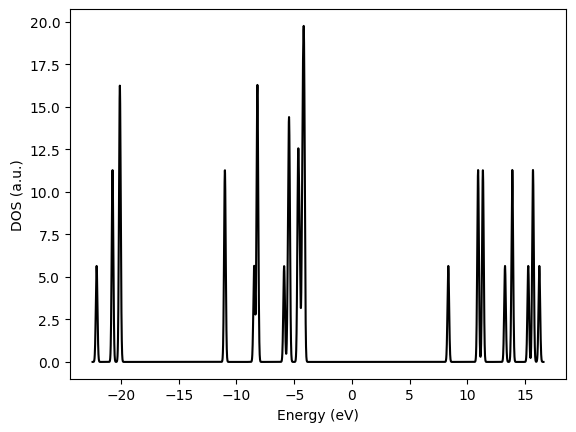

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

dos_tot=np.loadtxt("dos.dat")
plt.plot(dos_tot[:,0],dos_tot[:,1],color="black")
plt.xlabel("Energy (eV)")
plt.ylabel("DOS (a.u.)")